In [3]:
# get data

In [1]:
!ls $WORK

kits23	test.txt


In [1]:
!cd kits23 && pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/julian/Schreibtisch/medical-deep-learning/kits23
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/deepmind/surface-distance.git to /tmp/pip-install-ym080hn4/surface-distance-based-measures_a5701be8b59e4478946f3aeccdd1c3cc
  Running command git clone --filter=blob:none --quiet https://github.com/deepmind/surface-distance.git /tmp/pip-install-ym080hn4/surface-distance-based-measures_a5701be8b59e4478946f3aeccdd1c3cc
  Resolved https://github.com/deepmind/surface-distance.git to commit ee651c80e11ab5fcc3d1b0c1c6e7bbc6fb4c987c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 6.3 MB/s eta 0:00:00m eta 0:00:

  Running setup.py develop for kits23


In [4]:
!kits23_download_data


Found 321 cases to download

Dowloading case_00588...: 100%|█████████████| 321/321 [1:41:58<00:00, 19.06s/it]


In [5]:
# investigate data

In [12]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:0000:010:01


In [10]:
!python -c "import monai" || pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==1.1.0"

In [1]:
import kits23

/home/julian/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


/home/julian/Schreibtisch/medical-deep-learning/kits23/dataset
image data shape: torch.Size([1, 611, 512, 512])
meta data: dict_keys(['sizeof_hdr', 'extents', 'session_error', 'dim_info', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'qform_code', 'sform_code', affine, original_affine, 'as_closest_canonical', spatial_shape, space, original_channel_dim, 'filename_or_obj'])


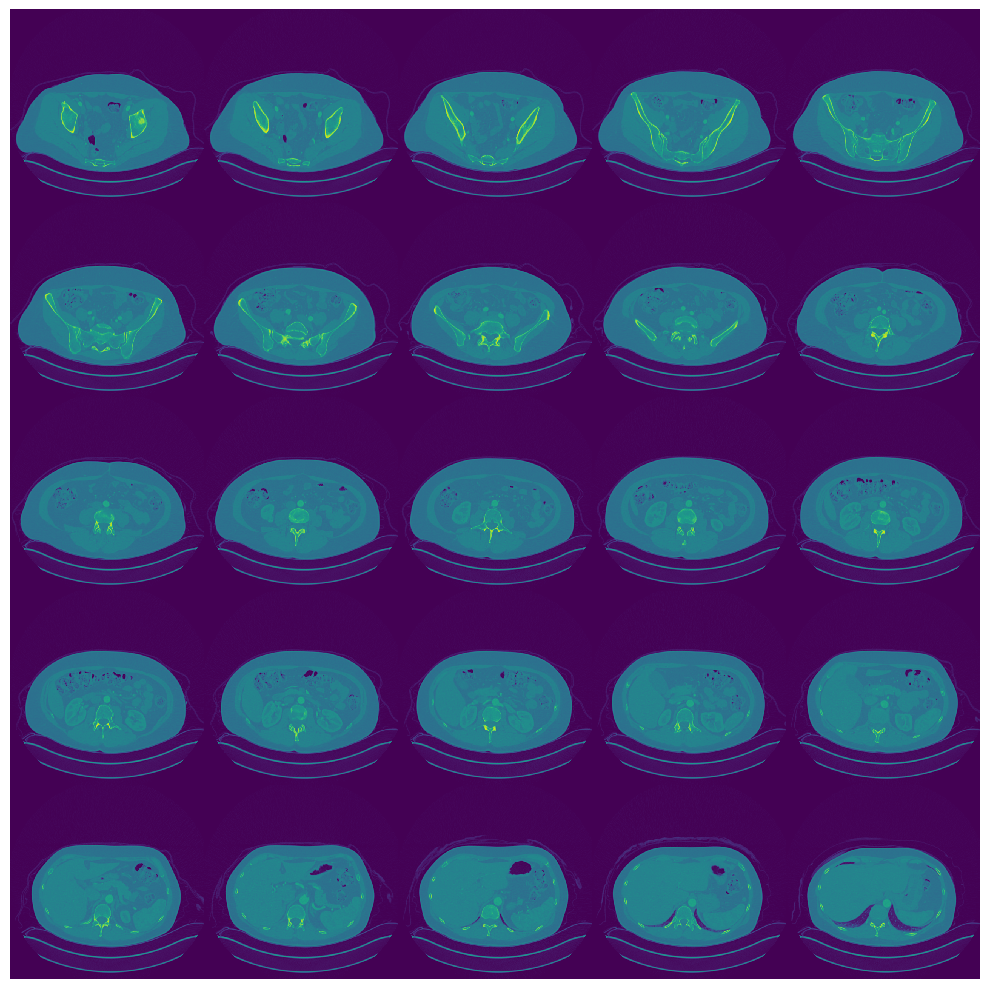

In [2]:
import os
import monai
from monai.data import PILReader, Dataset
from monai.transforms import LoadImage, LoadImaged, Resized, Compose, SaveImage, ScaleIntensityd, EnsureChannelFirstd, \
    RandRotated, RandZoomd

from kits23.configuration.paths import TRAINING_DIR

data_dir = TRAINING_DIR
print(data_dir)

test = os.path.join(data_dir, "case_00000/imaging.nii.gz")
data = LoadImage(image_only=True, ensure_channel_first=True, simple_keys=True)(test)
print(f"image data shape: {data.shape}")
print(f"meta data: {data.meta.keys()}")

fig = monai.visualize.matshow3d(monai.transforms.Orientation("SPL")(data), every_n=25)

In [1]:
import os
import monai
from monai.data import PILReader, Dataset
from monai.transforms import LoadImage, LoadImaged, Resized, Compose, SaveImage, ScaleIntensityd, EnsureChannelFirstd, \
    RandRotated, RandZoomd

from kits23.configuration.paths import TRAINING_DIR

data_dir = TRAINING_DIR
print(data_dir)

test = os.path.join(data_dir, "case_00001/imaging.nii.gz")
data = LoadImage(image_only=True, ensure_channel_first=True, simple_keys=True)(test)
print(f"image data shape: {data.shape}")
print(f"meta data: {data.meta.keys()}")

/gss/work/koku6232/kits23/dataset
image data shape: torch.Size([1, 602, 512, 512])
meta data: dict_keys(['sizeof_hdr', 'extents', 'session_error', 'dim_info', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'qform_code', 'sform_code', affine, original_affine, 'as_closest_canonical', spatial_shape, space, original_channel_dim, 'filename_or_obj'])


In [2]:
test = os.path.join(data_dir, "case_00002/imaging.nii.gz")
data = LoadImage(image_only=True, ensure_channel_first=True, simple_keys=True)(test)
print(f"image data shape: {data.shape}")
print(f"meta data: {data.meta.keys()}")

image data shape: torch.Size([1, 261, 512, 512])
meta data: dict_keys(['sizeof_hdr', 'extents', 'session_error', 'dim_info', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'qform_code', 'sform_code', affine, original_affine, 'as_closest_canonical', spatial_shape, space, original_channel_dim, 'filename_or_obj'])


image data shape: torch.Size([1, 611, 512, 512])
meta data: dict_keys(['sizeof_hdr', 'extents', 'session_error', 'dim_info', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'qform_code', 'sform_code', affine, original_affine, 'as_closest_canonical', spatial_shape, space, original_channel_dim, 'filename_or_obj'])


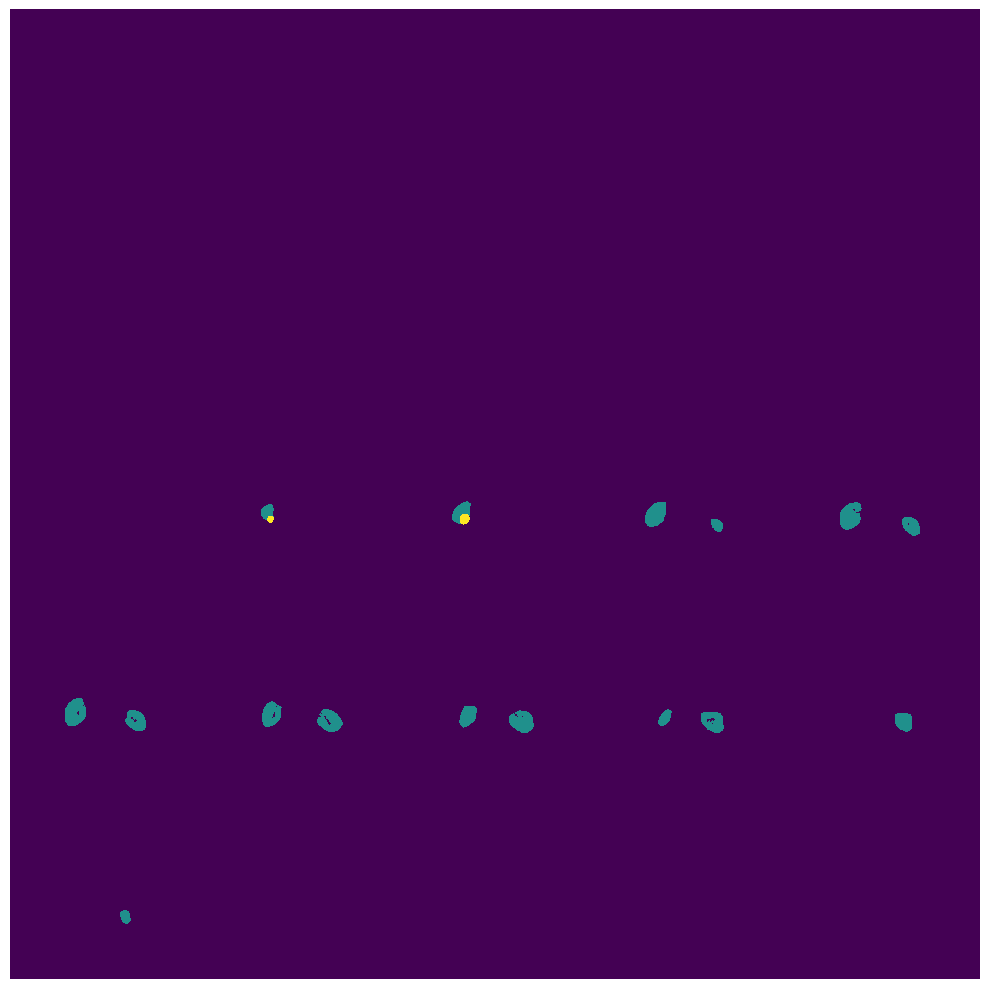

In [5]:
test = os.path.join(data_dir, "case_00000/segmentation.nii.gz")
data = LoadImage(image_only=True, ensure_channel_first=True, simple_keys=True)(test)
print(f"image data shape: {data.shape}")
print(f"meta data: {data.meta.keys()}")

fig = monai.visualize.matshow3d(monai.transforms.Orientation("SPL")(data), every_n=25)

In [3]:
# investigate the data:
import torch

from monai.data import NibabelReader

from kits23 import TRAINING_CASE_NUMBERS
from kits23.configuration.paths import TRAINING_DIR

data_dir = TRAINING_DIR
images = [(TRAINING_DIR / f"case_{n:05d}" / "imaging.nii.gz").resolve(strict=True) for n in TRAINING_CASE_NUMBERS]
segs = [(TRAINING_DIR / f"case_{n:05d}" / "segmentation.nii.gz").resolve(strict=True) for n in TRAINING_CASE_NUMBERS]

shapes = []
image_reader = NibabelReader()

for image in images:
    img_obj = image_reader.read(images)
    img_data, meta_data = image_reader.get_data(img_obj)
    print(img_data)
    break

# print(img_data)
    
# print(mean = torch.mean(torch.stack(shapes)))
# shape of all samples
# (x, 512, 512)

# values ranges


RuntimeError: affine matrix of all images should be the same for channel-wise concatenation. Got [[ 0.          0.         -0.79882812  0.        ]
 [ 0.         -0.79882812  0.          0.        ]
 [-0.5         0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]] and [[ 0.          0.         -0.91992188  0.        ]
 [ 0.         -0.91992188  0.          0.        ]
 [-0.5         0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]].